[Retour au sommaire](../index.ipynb)

# 8.2 Algorithmique : Tris par insertion et sélection

Le tri est une opération qui permet d'**ordonner** un ensemble d'éléments.
C'est une opération très courante en informatique.

## Propriétés des tris

Tous les tris que nous étudierons en NSI (première et terminale) font partie de la famille des tris par **comparaisons**. Les tris par comparaison comparent les éléments par des **fonctions binaires** (<, >) ou éventuellement ternaires quand le cas de l'égalité est à prendre en compte.


### Tri en place

Un tri est dit **en place** (in place) si il n'est pas nécessaire de faire une copie de la liste. Dans ce cas la liste d'origine sera directement modifiée. Les tris en place nécessitent peu de mémoire.

### Tri stable

Un tri est **stable** si il préserve l'ordonnancement des éléments qui sont égaux.

### complexité

On distingue deux types de complexité:

1. La complexité **temporelle** qui permet d'estimer le **temps d'execution** de l'algorithme.
2. La complexité **spatiale** qui permet d'estimer la **mémoire nécessaire** à l'execution de l'algorithme.

Nous n'étudierons que la complexité **temporelle** et dans le cas **défavorable** c'est à dire, ici, le cas d'une liste triée à l'envers.

La complexité temporelle, souvent notée $T$ s'exprime en fonction de $n$ le nombre d'éléments à trier.

On s'interesse au comportement quand n est très grand et on ne retient que les **termes significatifs**.

Ainsi, si on trouve que $T(n)=n^2+2n+1$ on notera $T(n)=\Theta(n^2)$

Voici quelques complexités que nous rencontrerons en NSI:

<table>
    <colgroup>
        <col style="border:1px solid black">
        <col style="border:1px solid black">
    </colgroup>
    <thead>
        <tr style="border:1px solid black">
            <th>Complexité dans le cas optimal (déjà triée)</th>
            <th>Complexité dans le cas défavorable (triée à l'envers)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Constante</td>
            <td>$T(n) = \Theta(1)$</td>
        </tr>
        <tr>
            <td>Logarithmique</td>
            <td>$T(n)=\Theta(log(n))$</td>
        </tr>
        <tr>
            <td>Linéarithmique (ou pseudo-linéaire)</td>
            <td>$T(n)=\Theta(n \times log(n))$</td>
        </tr>
        <tr>
            <td>Linéaire</td>
            <td>$T(n)=\Theta(n)$</td>
        </tr>
        <tr>
            <td>Quadratique</td>
            <td>$T(n)=\Theta(n^2)$</td>
        </tr>
        <tr>
            <td>Factorielle</td>
            <td>$T(n)=\Theta(n!)$</td>
        </tr>
    </tbody>
</table>


Voici une [comparaison de différentes complexités temporelles](https://fr.wikipedia.org/wiki/Analyse_de_la_complexit%C3%A9_des_algorithmes#Complexit%C3%A9,_comparatif).

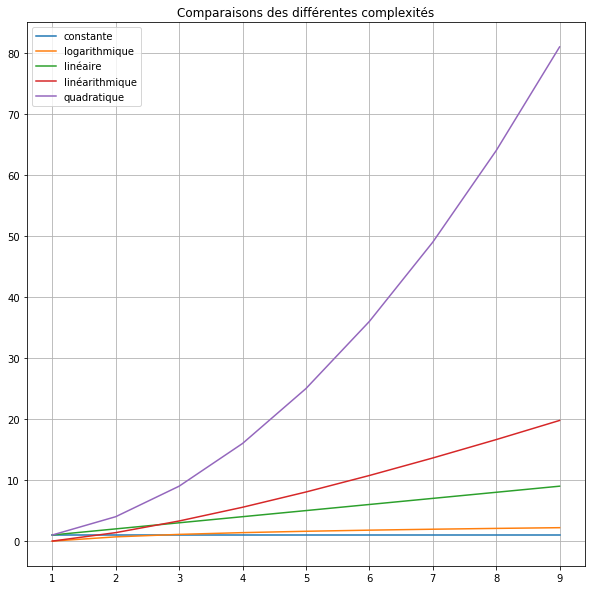

In [12]:
import matplotlib.pyplot as plt
from math import log, factorial

plt.figure(figsize=(10, 10))
x = range(1,10)
y1 = [1 for i in x]
y2 = [i for i in x]
y3 = [i**2 for i in x]
y4 = [log(i) for i in x]
y5 = [i*log(i) for i in x]
y6 = [factorial(i) for i in x]
plt.plot(x, y1, label='constante')
plt.plot(x, y4, label='logarithmique')
plt.plot(x, y2, label='linéaire')
plt.plot(x, y5, label='linéarithmique')
plt.plot(x, y3, label='quadratique')
#plt.plot(x, y6, label='factorielle')
plt.legend()
plt.title('Comparaisons des différentes complexités')
plt.grid(True)
plt.show()

### Ecriture de votre algorithme

Avant d'étudier les deux algorithmes de tri étudiés en première NSI, vous allez essayer de trouver par vous même un algorithe de tri.

Le but est de décrire dans un pseudo code, un algorithme qui permet, à votre binôme, de trier [ces tonneaux](http://lwh.free.fr/pages/algo/tri/tri.htm).

<span id="tri_selection"></span>
## Le tri par selection

### principe

Le principe est simple :

- Dans un tableau à n éléments (indices 0 à n-1) on recherche le plus petit élément et on l'échange avec l'élément d'indice 0.
- Dans le tableau non trié restant (indices 1 à n-1) on recherche le plus petit élément et on l'échange avec l'élément d'indice 1.
- Dans le tableau non trié restant (indices 2 à n-1) on recherche le plus petit élément et on l'échange avec l'élément d'indice 2.
- etc etc

Voir l'[algorithme en musique](https://www.youtube.com/watch?v=Ns4TPTC8whw)

### pseudo-code

```
tri_selection(tableau t)
    n ← longueur(t) 
    pour i de 0 à n - 2
        min ← i       
        pour j de i + 1 à n - 1
            si t[j] < t[min], alors min ← j
        fin pour
        si min ≠ i, alors échanger t[i] et t[min]
    fin pour
fin procédure
```

In [14]:
from IPython.display import IFrame    
IFrame('https://www.cahier-nsi.fr/tri_par_selection/', width=800, height=650)

### complexité temporelle
Prenons un tableau de $n$ éléments trié dans l'ordre décroissant (pire des cas)
- Lors du premier passage dans la boucle il y aura $n-1$ comparaisons.
- Lors du deuxième passage dans la boucle il y aura $n-2$ comparaisons.
- ...
- Lors du nième passage dans la boucle il y aura $1$ comparaison.

Le nombre total de comparaisons à effectuer est donc $1+2+3+....+(n-2)+(n-1)$ autrement dit $\sum_{j=1}^{n-1} j$

Il s'agit donc de la somme d'une **suite arithmétique de raison 1** du premier terme 1 jusqu'au dernier terme n-1. 

On obtient donc $T(n) = \frac{1+n-1}{2} \times {(n-1)} = \frac{n(n-1)}{2}$

**La complexité temporelle est donc $T(n) = \Theta(n^2)$ elle est donc quadratique.**

On peut remarquer que, pour une liste déjà triée, le nombre de comparaisons est identique.

<div class="alert alert-info">A FAIRE : Implémenter la fonction <i>tri_selection</i> en Python.</div>

In [ ]:
from random import shuffle
ma_liste = [i for i in range(100)]

# on mélange la liste
shuffle(ma_liste)
# On affiche la liste
print(ma_liste)

def tri_selection(tab):
    pass

# Appel de la fonction
tri_selection(ma_liste)
# On affiche la liste triée
print(ma_liste)

<div class="alert alert-info">
A FAIRE : Créer un nuage de points dont les coordonnées sont :
    <ul>
        <li>x : le nombre d'éléments à trier dans le cas d'une liste triée à l'envers</li>
        <li>y : le temps nécessaire pour trier cette liste. On utilisera la fonction process_time() du module time</li>
    </ul>
</div>
<ul>
    <li>Quelle est l'allure générale de la courbe obtenue ?</li>
    <li>Cela correspond-il aux prévisions théoriques ?</li>
    <li>Ajouter un second nuage de points pour des listes déjà triées. Que constatez vous ?</li>
</ul>

[Voici une excellente page pour le **tri par selection**.](http://lwh.free.fr/pages/algo/tri/tri_selection.html)

<span id="tri_insertion"></span>

## Le tri par insertion

Le principe est également assez simple:

- on prend la deuxième case de notre tableau que l'on compare avec la première. On échange si besoin.
- on prend la troisième case de notre tableau que l'on compare avec les précédentes de la droite vers la gauche. On décale tant que la troisième carte est inférieure puis on échange.
- on prend la quatrième case de notre tableau que l'on compare avec les précédentes de la droite vers la gauche. On décale tant que la quatrième carte est inférieure puis on échange.
- etc etc jusqu'à la dernière carte.

Voir l'[algorithme en musique](https://www.youtube.com/watch?v=ROalU379l3U).

In [13]:
from IPython.display import IFrame    
IFrame('https://www.cahier-nsi.fr/tri_par_insertion/', width=800, height=650)

[Voici une excellente page pour le **tri par insertion**.](http://lwh.free.fr/pages/algo/tri/tri_insertion.html)

### complexité temporelle
Prenons un tableau de $n$ éléments trié dans l'ordre décroissant (pire des cas)

- pour la case n°2 il y a 1 comparaison et un déplacement
- pour la case n°3 il y a 2 comparaisons et deux déplacements
- pour la case n°4 il y a 3 comparaisons et trois déplacements
- ...
- pour la case n°n il y a n-1 comparaisons et n-1 déplacements

Le nombre total de comparaisons/deplacement à effectuer est donc $1+2+3+....+(n-2)+(n-1)$

On arrive donc à un résultat identique à l'autre algorithme de tri

On obtient donc $T(n) = \frac{1+n-1}{2} \times {(n-1)} = \frac{n(n-1)}{2}$

**La complexité temporelle est donc $T(n) = \Theta(n^2)$, elle est quadratique.**

On peut cependant remarquer que, pour une liste déjà triée, il n'y a aucun déplacement dans le tableau il n'y a plus que n comparaisons.

<div class="alert alert-info">A FAIRE : Implémenter la fonction <i>tri_selection</i> en Python.</div>

### Pseudo code

```
tri_insertion(tableau T)
    pour i de 1 à taille(T) - 1
        # mémoriser T[i] dans key
        key ← T[i]                            
        # décaler vers la droite les éléments T[0]..T[i-1] qui sont plus grands que x, en partant de T[i-1]
        j ← i-1                               
        tant que j >= 0 et key < T[j]:
            T[j] ← T[j + 1]
            j ← j - 1
        # placer key dans le "trou" laissé par le décalage (j+1) car on vient de faire j=j-1
        T[j+1] ← key                            
```

In [ ]:
from random import shuffle
ma_liste = [i for i in range(10)]

# on mélange la liste
shuffle(ma_liste)
# On affiche la liste
print(ma_liste)

def tri_insertion(l):
    pass

# Appel de la fonction
tri_insertion(ma_liste)
# On affiche la liste triée
print(ma_liste)


**A FAIRE** : 
- Générer un graphique permettant de comparer les vitesses des deux tris pour des listes de 500 à 2500 élements, avec un pas de 50 éléments.
- Générer également le tableau des données avec la librairie [PrettyTable](https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/)

In [ ]:
import matplotlib.pyplot as plt
from time import process_time
from prettytable import PrettyTable

### A VOUS DE CODER
    
plt.figure(figsize=(10, 10))
plt.xlabel("nombre d'éléments dans la liste")
plt.ylabel("durée (en s)")
plt.scatter(x, y1, label='Tri insertion dans le pire des cas.')
plt.scatter(x, y2, label='Tri selection dans le pire des cas.')
plt.legend()
plt.title('Comparaisons des performances du tri par insertion et du tri par selection')
plt.grid(True)
plt.show()

<div class="alert alert-danger">ATTENTION : On a démontré que ces tris ont tous deux une complexité quadratique dans le pire des cas. Ceci n'<b>implique pas</b> qu'ils ont les mêmes durées de traitement. On peut juste conclure qu'ils évoluent chacun de manière quadratique.</div>


## Bilan

Les deux algorithmes donnent des complexités temporelles quadratiques si on se place dans le pire des cas.

Sachant que les algorithmes de tris les plus efficaces (quick sort, tri fusion, timsort...) ont des complexités temporelles d'ordre **linéarithmique**, ces 2 algorithmes sont donc loin d'être optimaux.

<table>
    <thead>
        <tr>
            <td></td>
            <th>Complexité dans le cas optimal (déjà triée)</th>
            <th>Complexité dans le cas défavorable (triée à l'envers)</th>
            <th>Stable</th>
            <th>En place</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Tri par sélection</th>
            <td>$T(n) = \Theta(n^2)$</td>
            <td>$T(n) = \Theta(n^2)$</td>
            <td>NON</td>
            <td>OUI</td>
        </tr>
        <tr>
            <th>Tri par insertion</th>
            <td>$T(n) = \Theta(n)$</td>
            <td>$T(n) = \Theta(n^2)$</td>
            <td>OUI</td>
            <td>OUI</td>
        </tr>
    </tbody>
</table>


[Retour au sommaire](../index.ipynb)